In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sideinfo_release import *

In [17]:
def generate_data_2D(job=0, n_samples=10000,data_vis=0):
    if job == 0: # Gaussian mixtures 
        x1 = np.random.uniform(-1,1,size = n_samples)
        x2 = np.random.uniform(-1,1,size = n_samples)
        pi1 = ((mlab.bivariate_normal(x1, x2, 0.25, 0.25, -0.5, -0.2)+
               mlab.bivariate_normal(x1, x2, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)        
        p = np.zeros(n_samples)
        h = np.zeros(n_samples)
               
        for i in range(n_samples):
            rnd = np.random.uniform()
            if rnd > pi1[i]:
                p[i] = np.random.uniform()
                h[i] = 0
            else:
                p[i] = np.random.beta(a = 0.3, b = 4)
                h[i] = 1
        X = np.concatenate([[x1],[x2]]).T
        
        if data_vis == 1:
            fig = plt.figure()
            ax1 = fig.add_subplot(121)
            x_grid = np.arange(-1, 1, 1/100.0)
            y_grid = np.arange(-1, 1, 1/100.0)
            X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
            pi1_grid = ((mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, -0.5, -0.2)+
               mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)  
            ax1.pcolor(X_grid, Y_grid, pi1_grid)
            
            ax2 = fig.add_subplot(122)
            alt=ax2.scatter(x1[h==1][1:50], x2[h==1][1:50],color='r')
            nul=ax2.scatter(x1[h==0][1:50], x2[h==0][1:50],color='b')
            ax2.legend((alt,nul),('50 alternatives', '50 nulls'))
            
        return X_grid, Y_grid, pi1_grid
    if job == 1: # Linear trend
        
        x1 = np.random.uniform(-1,1,size = n_samples)
        x2 = np.random.uniform(-1,1,size = n_samples)
        pi1 = 0.1 * (x1 + 1) /2 +  0.3 *(1-x2) / 2
        
        p = np.zeros(n_samples)
        h = np.zeros(n_samples)
         
        for i in range(n_samples):
            rnd = np.random.uniform()
            if rnd > pi1[i]:
                p[i] = np.random.uniform()
                h[i] = 0
            else:
                p[i] = np.random.beta(a = 0.3, b = 4)
                h[i] = 1
        X = np.concatenate([[x1],[x2]]).T
        
        if data_vis == 1:
            fig = plt.figure()
            ax1 = fig.add_subplot(121)
            x_grid = np.arange(-1, 1, 1/100.0)
            y_grid = np.arange(-1, 1, 1/100.0)
            X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
            pi1_grid =  0.1 * (X_grid + 1) /2 +  0.3 *(1-Y_grid) / 2
            
            ax1.pcolor(X_grid, Y_grid, pi1_grid)
            
            ax2 = fig.add_subplot(122)
            alt=ax2.scatter(x1[h==1][1:50], x2[h==1][1:50],color='r')
            nul=ax2.scatter(x1[h==0][1:50], x2[h==0][1:50],color='b')
            ax2.legend((alt,nul),('50 alternatives', '50 nulls'))
            
        return X_grid, Y_grid, pi1_grid
        
        
        
    if job == 2: # Gaussian mixture + linear trend
        x1 = np.random.uniform(-1,1,size = n_samples)
        x2 = np.random.uniform(-1,1,size = n_samples)
        pi1 = ((mlab.bivariate_normal(x1, x2, 0.25, 0.25, -0.5, -0.2)+
               mlab.bivariate_normal(x1, x2, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)        
        pi1 = pi1 * 0.5 + 0.5*(0.5 * (x1 + 1) /2 +  0.3 *(1-x2) / 2)
        
        p = np.zeros(n_samples)
        h = np.zeros(n_samples)
               
        for i in range(n_samples):
            rnd = np.random.uniform()
            if rnd > pi1[i]:
                p[i] = np.random.uniform()
                h[i] = 0
            else:
                p[i] = np.random.beta(a = 0.3, b = 4)
                h[i] = 1
        X = np.concatenate([[x1],[x2]]).T
        
        if data_vis == 1:
            fig = plt.figure()
            ax1 = fig.add_subplot(121)
            x_grid = np.arange(-1, 1, 1/100.0)
            y_grid = np.arange(-1, 1, 1/100.0)
            X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
            pi1_grid = ((mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, -0.5, -0.2)+
               mlab.bivariate_normal(X_grid, Y_grid, 0.25, 0.25, 0.7, 0.5))/2).clip(max=1)  * 0.5 + (0.5 * (0.5 * (X_grid + 1) /2 +  0.3 *(1-Y_grid) / 2))
            ax1.pcolor(X_grid, Y_grid, pi1_grid)
            
            ax2 = fig.add_subplot(122)
            alt=ax2.scatter(x1[h==1][1:50], x2[h==1][1:50],color='r')
            nul=ax2.scatter(x1[h==0][1:50], x2[h==0][1:50],color='b')
            ax2.legend((alt,nul),('50 alternatives', '50 nulls'))
            
        return X_grid, Y_grid, pi1_grid

In [20]:
x,y,pi1 = generate_data_2D(job = 0, n_samples=50000, data_vis=1)

NameError: name 'X_grid' is not defined

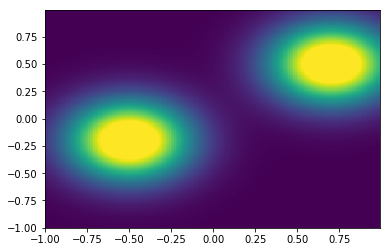

In [22]:
plt.pcolor(x, y, pi1)

In [26]:
network = get_network(num_layers = 10, cuda = True, dim = 2)

In [86]:
model_dir = 'exp/result_316268/'
outputs = []
for i in range(3):
    fn = model_dir + 'model_%d.th'%(i)
    #print(fn)
    network.load_state_dict(torch.load(fn))
    data = np.concatenate([np.expand_dims(x.flatten(),1), np.expand_dims(y.flatten(),1)],1).astype(np.float32)
    input = Variable(torch.from_numpy(data)).cuda()
    output = network(input)
    outputs.append(output.cpu().data.numpy())
    

In [87]:
res = np.concatenate(outputs,1).mean(axis = 1).reshape(200,200)

In [88]:
wg = np.loadtxt('ihw_wg.txt').reshape(200,200)

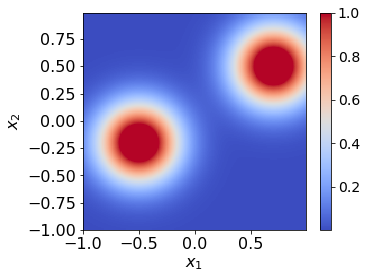

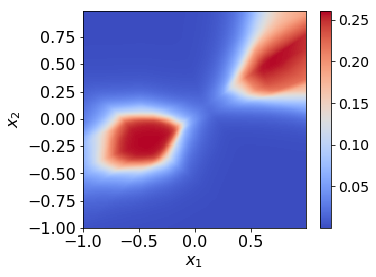

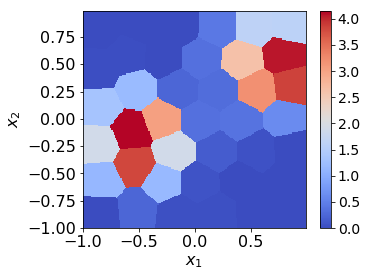

In [103]:
plt.figure(figsize = (5,4))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.pcolor(x, y, pi1, cmap = 'coolwarm')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.savefig('2dgaussian1.png', dpi=300, pad_inches=1, bbox_inches='tight')


plt.figure(figsize = (5,4))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.pcolor(x, y, res, cmap = 'coolwarm')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.savefig('2dgaussian2.png', dpi=300, pad_inches=1, bbox_inches='tight')


plt.figure(figsize = (5,4))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.pcolor(x, y, wg, cmap = 'coolwarm')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
plt.savefig('2dgaussian3.png', dpi=300, pad_inches=1, bbox_inches='tight')

